# Test file for coding this task

In [1]:
import numpy as np
import random
from datetime import datetime
from pathlib import Path
from psychopy import visual, monitors, event
from psychopy.hardware import keyboard

from get_instruction_text import get_instruction_text
from get_correct_responses import get_correct_responses

c:\Users\nuttida-lab\miniconda3\envs\WM_task\lib\site-packages\psychopy\preferences\preferences.py:11: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


## For init_task

In [2]:
output_folder = Path('..') / 'patientData' / 'taskLogs'
output_folder.mkdir(parents=True, exist_ok=True)

sub_id = '0'
file_name = f"{sub_id}_Sub_{datetime.now().strftime('%m-%d-%Y_%H-%M-%S')}"
print(file_name)

0_Sub_11-27-2025_22-36-17


In [42]:
# Setting up task variables
n_blocks = 4
n_trials_per_block = 48
n_trials = n_trials_per_block * n_blocks

# Trial conditions: 1 = instruction first; 2 = instruction last (retrocue)
trial_conditions = (
    [2] * n_trials_per_block +
    [1] * n_trials_per_block +
    [2] * n_trials_per_block +
    [1] * n_trials_per_block
)

In [43]:
# Which of the two axes belonging to each category will be used in each trial
trial_categories = [0, 1, 2, 3]
trial_axis = [0, 1]
# anti_task = [0, 1]
anti_task = [0] # getting rid of the anti-task
prompt_variant = [0, 1]
equivalent_variant_id = [0, 1]
response_variant = [0, 1] # button choice vs slider

In [44]:
# Guaranteeing a balanced distribution of each category x axis combination
x1, x2, x3, x4, x5, x6 = np.meshgrid(trial_categories, trial_axis, anti_task, prompt_variant, equivalent_variant_id, response_variant, indexing='ij')
result = np.column_stack([x1.ravel(), x2.ravel(), x3.ravel(), x4.ravel(), x5.ravel(), x6.ravel()])
n = result.shape[0]
factor = n_trials // n
# result = result * factor
result = np.repeat(result, factor, axis=0)
if len(result) < n_trials:
    result = np.concatenate([result, result[:n_trials - len(result)]])



In [16]:
result.shape

(192, 6)

In [17]:
np.unique(result, axis=0).shape

(64, 6)

In [18]:
print(n, factor)

64 3


In [45]:
# Which of the two axes belonging to each category will be used in each trial
trial_categories = [0, 1, 2, 3] # 4 categories
trial_axis = [0, 1] # 2 axes
stim_pair = [0, 1, 2] # 3 pairs of stimuli per category/axis
prompt_variant = [0, 1] # which prompt version to use (aspect of the axis)
response_variant = [0, 1] # button choice vs slider
cue_variant = [2, 1] # retrocue vs cue

# Guaranteeing a balanced distribution of each category x axis combination
x1, x2, x3, x4, x5, x6 = np.meshgrid(trial_categories, trial_axis, stim_pair, prompt_variant, response_variant, cue_variant, indexing='ij')
result = np.column_stack([x1.ravel(), x2.ravel(), x3.ravel(), x4.ravel(), x5.ravel(), x6.ravel()])
n = result.shape[0]
factor = n_trials // n
# result = result * factor
result = np.repeat(result, factor, axis=0)
if len(result) < n_trials:
    result = np.concatenate([result, result[:n_trials - len(result)]])

print(n, result.shape, factor)

192 (192, 6) 1


In [46]:
# save result to csv file

np.savetxt("trials.csv", result, delimiter=",", fmt="%d")

In [47]:
# Randomize trial order
result = np.random.permutation(result) 

# Sort into 4 blocks by cue variant (retrocue, cue, retrocue, cue)
cue_variant = result[:, 5]
retrocue_idxs = np.where(cue_variant == 2)[0] # retrocue trial idxs
cue_idxs = np.where(cue_variant == 1)[0] # cue trial idxs
sorted_idxs = np.concatenate([retrocue_idxs[:n_trials_per_block],
                                cue_idxs[:n_trials_per_block],
                                retrocue_idxs[n_trials_per_block:],
                                cue_idxs[n_trials_per_block:]])

In [35]:
cue_variant[sorted_idxs]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [36]:
result = result[sorted_idxs]

trial_categories = result[:, 0]
trial_axis_list = result[:, 1]
stim_pair = result[:, 2]
prompt_variant = result[:, 3]
response_variant = result[:, 4]
cue_variant = result[:, 5]

In [38]:
result[:n_trials_per_block,:]

array([[1, 1, 0, 0, 1, 2],
       [1, 0, 2, 0, 0, 2],
       [1, 0, 0, 1, 0, 2],
       [3, 1, 0, 0, 1, 2],
       [3, 1, 2, 0, 0, 2],
       [3, 0, 2, 1, 0, 2],
       [1, 0, 1, 1, 1, 2],
       [2, 1, 1, 1, 0, 2],
       [2, 0, 2, 0, 0, 2],
       [2, 1, 1, 0, 1, 2],
       [3, 0, 0, 1, 1, 2],
       [1, 1, 1, 1, 0, 2],
       [1, 1, 2, 0, 1, 2],
       [1, 1, 0, 0, 0, 2],
       [2, 1, 1, 1, 1, 2],
       [2, 1, 2, 0, 1, 2],
       [1, 1, 2, 0, 0, 2],
       [2, 1, 0, 1, 1, 2],
       [0, 0, 2, 1, 1, 2],
       [0, 0, 2, 0, 1, 2],
       [3, 1, 2, 1, 1, 2],
       [2, 1, 0, 0, 1, 2],
       [3, 0, 2, 0, 1, 2],
       [0, 0, 1, 0, 0, 2],
       [3, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 0, 2],
       [3, 0, 2, 1, 1, 2],
       [0, 0, 0, 0, 1, 2],
       [3, 1, 1, 1, 1, 2],
       [2, 0, 0, 0, 0, 2],
       [0, 0, 1, 1, 1, 2],
       [2, 1, 2, 1, 0, 2],
       [3, 0, 1, 1, 1, 2],
       [0, 1, 1, 0, 0, 2],
       [1, 1, 2, 1, 0, 2],
       [2, 1, 2, 0, 0, 2],
       [3, 0, 1, 0, 0, 2],
 

In [39]:
np.unique(result[:, 5], return_counts=True)

(array([1, 2]), array([96, 96], dtype=int64))

In [19]:
pair_numbers = {}
for i in trial_axis:  # 2 axes
    for j in trial_categories:  # 4 categories
        pair_numbers[(i, j)] = list(range(6)) * 4  # 6 pairs (0-5) x 4 repetitions


In [ ]:
pair_numbers.keys() # 2 axes * 4 categories

dict_keys([(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3)])

In [ ]:
pair_numbers[(0, 0)] # 6 pairs * 4 repetitions

[0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5]

In [6]:
# Determining which stimuli to use in each trial
stim_folder = Path('..') / 'stimuli' / 'Task_Stim_Version2'
trial_stims = [[None, None] for _ in range(n_trials)]
trial_pairs = np.zeros(n_trials, dtype=int)
stim1_position = np.full(n_trials, np.nan)
stim2_position = np.full(n_trials, np.nan)
break_trial = np.zeros(n_trials, dtype=int)

In [13]:
# Filling identical cells with identical trials to be drawn from (without replacement)
identical_trials = {}
for i, axes in enumerate(axis_names):
    print(i, axes)
    if 'Identical' in axes:
        idx = [0] * (n_trials_per_block // 4) + [1] * (n_trials_per_block // 4)
        random.shuffle(idx)
        identical_trials[i] = idx

identical_trials_for_replacement = {k: v.copy() for k, v in identical_trials.items()}

0 ['Colorful', 'Count']
1 ['New', 'Colorful']
2 ['New', 'Identical']
3 ['Count', 'Identical']


In [12]:
identical_trials_for_replacement

{2: [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0],
 3: [0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0]}

## checking new randomization order

In [3]:
# Setting up task variables
n_blocks = 4
n_trials_per_block = 48
n_trials = n_trials_per_block * n_blocks

In [4]:
# Which of the two axes belonging to each category will be used in each trial
trial_categories = [0, 1, 2, 3] # 4 categories
trial_axis = [0, 1] # 2 axes
stim_pair = [0, 1, 2] # 3 pairs of stimuli per category/axis
prompt_variant = [0, 1] # which prompt version to use (aspect of the axis)
response_variant = [0, 1] # button choice vs slider
cue_variant = [2, 1] # retrocue vs cue

# Guaranteeing a balanced distribution of each category x axis combination
x1, x2, x3, x4, x5, x6 = np.meshgrid(trial_categories, trial_axis, stim_pair, prompt_variant, response_variant, cue_variant, indexing='ij')
result = np.column_stack([x1.ravel(), x2.ravel(), x3.ravel(), x4.ravel(), x5.ravel(), x6.ravel()])
n = result.shape[0]
factor = n_trials // n
# result = result * factor
result = np.repeat(result, factor, axis=0)
if len(result) < n_trials:
    result = np.concatenate([result, result[:n_trials - len(result)]])

print(n, result.shape, factor)

192 (192, 6) 1


In [14]:
n_categories = len(trial_categories)
n_response_variants = len(response_variant)

In [5]:
# All indices with this cue
for cue_value in cue_variant:
    cue_mask = (result[:, 5] == cue_value)
    idxs = np.where(cue_mask)[0]           # length = 96

    cats  = result[idxs, 0].astype(int)    # shape (96,)
    resps = result[idxs, 4].astype(int)    # shape (96,)

    # Sort by (category, response_variant): groups become contiguous
    order_within = np.lexsort((resps, cats))   # primary key: cats, secondary: resps
    sorted_idxs_for_cue = idxs[order_within]

    break

In [11]:
result[sorted_idxs_for_cue,:]

array([[0, 0, 0, 0, 0, 2],
       [0, 0, 0, 1, 0, 2],
       [0, 0, 1, 0, 0, 2],
       [0, 0, 1, 1, 0, 2],
       [0, 0, 2, 0, 0, 2],
       [0, 0, 2, 1, 0, 2],
       [0, 1, 0, 0, 0, 2],
       [0, 1, 0, 1, 0, 2],
       [0, 1, 1, 0, 0, 2],
       [0, 1, 1, 1, 0, 2],
       [0, 1, 2, 0, 0, 2],
       [0, 1, 2, 1, 0, 2],
       [0, 0, 0, 0, 1, 2],
       [0, 0, 0, 1, 1, 2],
       [0, 0, 1, 0, 1, 2],
       [0, 0, 1, 1, 1, 2],
       [0, 0, 2, 0, 1, 2],
       [0, 0, 2, 1, 1, 2],
       [0, 1, 0, 0, 1, 2],
       [0, 1, 0, 1, 1, 2],
       [0, 1, 1, 0, 1, 2],
       [0, 1, 1, 1, 1, 2],
       [0, 1, 2, 0, 1, 2],
       [0, 1, 2, 1, 1, 2],
       [1, 0, 0, 0, 0, 2],
       [1, 0, 0, 1, 0, 2],
       [1, 0, 1, 0, 0, 2],
       [1, 0, 1, 1, 0, 2],
       [1, 0, 2, 0, 0, 2],
       [1, 0, 2, 1, 0, 2],
       [1, 1, 0, 0, 0, 2],
       [1, 1, 0, 1, 0, 2],
       [1, 1, 1, 0, 0, 2],
       [1, 1, 1, 1, 0, 2],
       [1, 1, 2, 0, 0, 2],
       [1, 1, 2, 1, 0, 2],
       [1, 0, 0, 0, 1, 2],
 

In [8]:
order_within

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22,  1,  3,  5,  7,  9,
       11, 13, 15, 17, 19, 21, 23, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
       44, 46, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 48, 50, 52,
       54, 56, 58, 60, 62, 64, 66, 68, 70, 49, 51, 53, 55, 57, 59, 61, 63,
       65, 67, 69, 71, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 73,
       75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95], dtype=int64)

In [15]:
# We know there are 8 (category, resp) combos
n_combos = n_categories * n_response_variants      # 8
group_size = len(sorted_idxs_for_cue) // n_combos  # 96 / 8 = 12

# Reshape to (8 combos, 12 trials per combo)
grouped = sorted_idxs_for_cue.reshape(n_combos, group_size)  # (8, 12)

# First half of each row → block A, second half → block B
half = group_size // 2  # 6
blockA = grouped[:, :half].ravel()        # (8 * 6,) = (48,)
blockB = grouped[:, half:2*half].ravel()  # (48,)

In [16]:
grouped

array([[  0,   4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44],
       [  2,   6,  10,  14,  18,  22,  26,  30,  34,  38,  42,  46],
       [ 48,  52,  56,  60,  64,  68,  72,  76,  80,  84,  88,  92],
       [ 50,  54,  58,  62,  66,  70,  74,  78,  82,  86,  90,  94],
       [ 96, 100, 104, 108, 112, 116, 120, 124, 128, 132, 136, 140],
       [ 98, 102, 106, 110, 114, 118, 122, 126, 130, 134, 138, 142],
       [144, 148, 152, 156, 160, 164, 168, 172, 176, 180, 184, 188],
       [146, 150, 154, 158, 162, 166, 170, 174, 178, 182, 186, 190]],
      dtype=int64)

In [18]:
blockA

array([  0,   4,   8,  12,  16,  20,   2,   6,  10,  14,  18,  22,  48,
        52,  56,  60,  64,  68,  50,  54,  58,  62,  66,  70,  96, 100,
       104, 108, 112, 116,  98, 102, 106, 110, 114, 118, 144, 148, 152,
       156, 160, 164, 146, 150, 154, 158, 162, 166], dtype=int64)

In [19]:
rng = np.random.default_rng()
blockA = blockA[rng.permutation(blockA.shape[0])]
blockB = blockB[rng.permutation(blockB.shape[0])]

In [20]:
blockA

array([ 20, 144,  54, 152, 114, 156, 166, 164, 154, 116,  66,  50,  96,
        12,  48,  10,  68, 148, 104,  52, 146,   8,  64,   4,  18,   2,
         6,  56,  22,  16, 102,  58, 162, 112, 106,  70,  62, 158,  60,
        14, 110, 118, 160, 108,   0, 150, 100,  98], dtype=int64)

In [21]:
result[blockA,:]

array([[0, 0, 2, 1, 0, 2],
       [3, 0, 0, 0, 0, 2],
       [1, 0, 0, 1, 1, 2],
       [3, 0, 1, 0, 0, 2],
       [2, 0, 2, 0, 1, 2],
       [3, 0, 1, 1, 0, 2],
       [3, 0, 2, 1, 1, 2],
       [3, 0, 2, 1, 0, 2],
       [3, 0, 1, 0, 1, 2],
       [2, 0, 2, 1, 0, 2],
       [1, 0, 2, 0, 1, 2],
       [1, 0, 0, 0, 1, 2],
       [2, 0, 0, 0, 0, 2],
       [0, 0, 1, 1, 0, 2],
       [1, 0, 0, 0, 0, 2],
       [0, 0, 1, 0, 1, 2],
       [1, 0, 2, 1, 0, 2],
       [3, 0, 0, 1, 0, 2],
       [2, 0, 1, 0, 0, 2],
       [1, 0, 0, 1, 0, 2],
       [3, 0, 0, 0, 1, 2],
       [0, 0, 1, 0, 0, 2],
       [1, 0, 2, 0, 0, 2],
       [0, 0, 0, 1, 0, 2],
       [0, 0, 2, 0, 1, 2],
       [0, 0, 0, 0, 1, 2],
       [0, 0, 0, 1, 1, 2],
       [1, 0, 1, 0, 0, 2],
       [0, 0, 2, 1, 1, 2],
       [0, 0, 2, 0, 0, 2],
       [2, 0, 0, 1, 1, 2],
       [1, 0, 1, 0, 1, 2],
       [3, 0, 2, 0, 1, 2],
       [2, 0, 2, 0, 0, 2],
       [2, 0, 1, 0, 1, 2],
       [1, 0, 2, 1, 1, 2],
       [1, 0, 1, 1, 1, 2],
 

In [ ]:
def make_blocks_for_cue_vectorized(result, cue_value, rng=None):
    """
    Vectorized: for a given cue_value (1 or 2), return two 48-trial blocks
    that are perfectly balanced in (category, response_variant).
    """
    if rng is None:
        rng = np.random.default_rng()

    # All indices with this cue
    cue_mask = (result[:, 5] == cue_value)
    idxs = np.where(cue_mask)[0]           # length = 96

    # Extract category and response_variant for those indices
    cats  = result[idxs, 0].astype(int)    # shape (96,)
    resps = result[idxs, 4].astype(int)    # shape (96,)

    # Sort by (category, response_variant): groups become contiguous
    order_within = np.lexsort((resps, cats))   # primary key: cats, secondary: resps
    sorted_idxs_for_cue = idxs[order_within]

    # We know there are 8 (category, resp) combos
    n_combos = n_categories * n_response_variants      # 8
    group_size = len(sorted_idxs_for_cue) // n_combos  # 96 / 8 = 12

    # Reshape to (8 combos, 12 trials per combo)
    grouped = sorted_idxs_for_cue.reshape(n_combos, group_size)  # (8, 12)

    # First half of each row → block A, second half → block B
    half = group_size // 2  # 6
    blockA = grouped[:, :half].ravel()        # (8 * 6,) = (48,)
    blockB = grouped[:, half:2*half].ravel()  # (48,)

    # Shuffle within each block so categories/resp types are intermixed
    blockA = blockA[rng.permutation(blockA.shape[0])]
    blockB = blockB[rng.permutation(blockB.shape[0])]

    return blockA, blockB

In [ ]:
# Randomize trial order
result = np.random.permutation(result) 

# Sort into 4 blocks by cue variant (retrocue, cue, retrocue, cue)
cue_variant = result[:, 5]
retrocue_idxs = np.where(cue_variant == 2)[0] # retrocue trial idxs
cue_idxs = np.where(cue_variant == 1)[0] # cue trial idxs
sorted_idxs = np.concatenate([retrocue_idxs[:n_trials_per_block],
                                cue_idxs[:n_trials_per_block],
                                retrocue_idxs[n_trials_per_block:],
                                cue_idxs[n_trials_per_block:]])

In [22]:
# Randomize trial order
result = np.random.permutation(result) 

In [23]:
# All indices with this cue
for cue_value in cue_variant:
    cue_mask = (result[:, 5] == cue_value)
    idxs = np.where(cue_mask)[0]           # length = 96

    cats  = result[idxs, 0].astype(int)    # shape (96,)
    resps = result[idxs, 4].astype(int)    # shape (96,)

    # Sort by (category, response_variant): groups become contiguous
    order_within = np.lexsort((resps, cats))   # primary key: cats, secondary: resps
    sorted_idxs_for_cue = idxs[order_within]

    break

In [24]:
result[sorted_idxs_for_cue,:]

array([[0, 0, 0, 0, 0, 2],
       [0, 1, 1, 0, 0, 2],
       [0, 1, 0, 0, 0, 2],
       [0, 0, 2, 0, 0, 2],
       [0, 0, 1, 1, 0, 2],
       [0, 1, 2, 1, 0, 2],
       [0, 0, 1, 0, 0, 2],
       [0, 1, 0, 1, 0, 2],
       [0, 1, 1, 1, 0, 2],
       [0, 0, 2, 1, 0, 2],
       [0, 1, 2, 0, 0, 2],
       [0, 0, 0, 1, 0, 2],
       [0, 1, 1, 0, 1, 2],
       [0, 1, 0, 0, 1, 2],
       [0, 1, 2, 1, 1, 2],
       [0, 0, 1, 0, 1, 2],
       [0, 0, 2, 0, 1, 2],
       [0, 1, 1, 1, 1, 2],
       [0, 1, 0, 1, 1, 2],
       [0, 0, 1, 1, 1, 2],
       [0, 0, 2, 1, 1, 2],
       [0, 0, 0, 1, 1, 2],
       [0, 1, 2, 0, 1, 2],
       [0, 0, 0, 0, 1, 2],
       [1, 0, 2, 1, 0, 2],
       [1, 1, 0, 1, 0, 2],
       [1, 0, 2, 0, 0, 2],
       [1, 0, 0, 0, 0, 2],
       [1, 1, 2, 1, 0, 2],
       [1, 0, 1, 0, 0, 2],
       [1, 1, 0, 0, 0, 2],
       [1, 0, 0, 1, 0, 2],
       [1, 1, 1, 0, 0, 2],
       [1, 1, 2, 0, 0, 2],
       [1, 1, 1, 1, 0, 2],
       [1, 0, 1, 1, 0, 2],
       [1, 0, 0, 1, 1, 2],
 

In [25]:
print((result[sorted_idxs_for_cue,4] == 0).sum())
print((result[sorted_idxs_for_cue,4] == 1).sum())

for i in range(4):
    print((result[sorted_idxs_for_cue,0] == i).sum())

48
48
24
24
24
24


In [27]:
# We know there are 8 (category, resp) combos
n_combos = n_categories * n_response_variants      # 8
group_size = len(sorted_idxs_for_cue) // n_combos  # 96 / 8 = 12

# Reshape to (8 combos, 12 trials per combo)
grouped = sorted_idxs_for_cue.reshape(n_combos, group_size)  # (8, 12)

# First half of each row → block A, second half → block B
half = group_size // 2  # 6
blockA = grouped[:, :half].ravel()        # (8 * 6,) = (48,)
blockB = grouped[:, half:2*half].ravel()  # (48,)

In [28]:
grouped

array([[  6,  34,  35,  44,  55, 109, 121, 146, 147, 149, 177, 179],
       [ 14,  15,  73,  76,  95, 132, 139, 150, 151, 152, 172, 181],
       [ 42,  47,  51,  52,  60,  75,  86, 117, 118, 124, 127, 154],
       [  8,  33,  63,  67,  91,  92,  93, 104, 108, 111, 112, 129],
       [  2,   7,  18,  39,  40,  56, 122, 130, 160, 161, 165, 191],
       [  3,  16,  26,  59,  62,  71, 100, 106, 115, 131, 133, 176],
       [  0,  12,  28,  49,  57, 102, 120, 140, 168, 174, 183, 185],
       [  9,  13,  19,  36,  37,  43,  72,  90,  99, 103, 155, 182]],
      dtype=int64)

In [29]:
blockA

array([  6,  34,  35,  44,  55, 109,  14,  15,  73,  76,  95, 132,  42,
        47,  51,  52,  60,  75,   8,  33,  63,  67,  91,  92,   2,   7,
        18,  39,  40,  56,   3,  16,  26,  59,  62,  71,   0,  12,  28,
        49,  57, 102,   9,  13,  19,  36,  37,  43], dtype=int64)

In [30]:
rng = np.random.default_rng()
blockA = blockA[rng.permutation(blockA.shape[0])]
blockB = blockB[rng.permutation(blockB.shape[0])]

In [31]:
blockA

array([ 91,  59,  67,  52,   6,  47,  36,  16,  73,  71,  13,  28,  56,
        18,  76,  62,   8,  55,  15,  60,  92,  49,   9,   7,  75,  34,
        40,  43,  19,   2,  33,  14,  57,  44,  95,  39, 109,  12,  63,
         3,  26,  51, 132, 102,  37,  42,   0,  35], dtype=int64)

In [33]:
result[blockA,:]

array([[1, 1, 0, 0, 1, 2],
       [2, 1, 0, 1, 1, 2],
       [1, 1, 1, 1, 1, 2],
       [1, 0, 0, 0, 0, 2],
       [0, 0, 0, 0, 0, 2],
       [1, 1, 0, 1, 0, 2],
       [3, 0, 2, 1, 1, 2],
       [2, 1, 1, 1, 1, 2],
       [0, 1, 2, 1, 1, 2],
       [2, 0, 2, 0, 1, 2],
       [3, 1, 0, 1, 1, 2],
       [3, 0, 0, 1, 0, 2],
       [2, 1, 2, 0, 0, 2],
       [2, 0, 0, 1, 0, 2],
       [0, 0, 1, 0, 1, 2],
       [2, 1, 2, 1, 1, 2],
       [1, 0, 0, 1, 1, 2],
       [0, 0, 1, 1, 0, 2],
       [0, 1, 0, 0, 1, 2],
       [1, 1, 2, 1, 0, 2],
       [1, 1, 0, 1, 1, 2],
       [3, 1, 2, 1, 0, 2],
       [3, 0, 0, 0, 1, 2],
       [2, 1, 2, 1, 0, 2],
       [1, 0, 1, 0, 0, 2],
       [0, 1, 1, 0, 0, 2],
       [2, 0, 2, 1, 0, 2],
       [3, 1, 1, 1, 1, 2],
       [3, 1, 1, 0, 1, 2],
       [2, 0, 1, 0, 0, 2],
       [1, 0, 2, 1, 1, 2],
       [0, 1, 1, 0, 1, 2],
       [3, 0, 1, 1, 0, 2],
       [0, 0, 2, 0, 0, 2],
       [0, 0, 2, 0, 1, 2],
       [2, 0, 0, 0, 0, 2],
       [0, 1, 2, 1, 0, 2],
 

In [32]:
print((result[blockA,4] == 0).sum())
print((result[blockA,4] == 1).sum())

for i in range(4):
    print((result[blockA,0] == i).sum())

24
24
12
12
12
12


In [ ]:
trial_categories = [0, 1, 2, 3] # 4 categories
trial_axis = [0, 1] # 2 axes
stim_pair = [0, 1, 2] # 3 pairs of stimuli per category/axis
prompt_variant = [0, 1] # which prompt version to use (aspect of the axis)
response_variant = [0, 1] # button choice vs slider
cue_variant = [2, 1] # retrocue vs cue

In [36]:
for i in range(6):
    print(np.unique(result[blockB,i], return_counts=True))

(array([0, 1, 2, 3]), array([12, 12, 12, 12], dtype=int64))
(array([0, 1]), array([25, 23], dtype=int64))
(array([0, 1, 2]), array([16, 17, 15], dtype=int64))
(array([0, 1]), array([26, 22], dtype=int64))
(array([0, 1]), array([24, 24], dtype=int64))
(array([2]), array([48], dtype=int64))


In [34]:
print((result[blockB,4] == 0).sum())
print((result[blockB,4] == 1).sum())

for i in range(4):
    print((result[blockB,0] == i).sum())

24
24
12
12
12
12


## cleaned up

In [2]:
# Setting up task variables
n_blocks = 4
n_trials_per_block = 48
n_trials = n_trials_per_block * n_blocks

In [3]:
# Which of the two axes belonging to each category will be used in each trial
trial_categories = [0, 1, 2, 3] # 4 categories
trial_axis = [0, 1] # 2 axes
stim_pair = [0, 1, 2] # 3 pairs of stimuli per category/axis
prompt_variant = [0, 1] # which prompt version to use (aspect of the axis)
response_variant = [0, 1] # button choice vs slider
cue_variant = [2, 1] # retrocue vs cue

# Guaranteeing a balanced distribution of each category x axis combination
x1, x2, x3, x4, x5, x6 = np.meshgrid(trial_categories, trial_axis, stim_pair, prompt_variant, response_variant, cue_variant, indexing='ij')
result = np.column_stack([x1.ravel(), x2.ravel(), x3.ravel(), x4.ravel(), x5.ravel(), x6.ravel()])
n = result.shape[0]
factor = n_trials // n
# result = result * factor
result = np.repeat(result, factor, axis=0)
if len(result) < n_trials:
    result = np.concatenate([result, result[:n_trials - len(result)]])

print(n, result.shape, factor)

192 (192, 6) 1


In [4]:
n_categories = len(trial_categories)
n_response_variants = len(response_variant)

# Randomize trial order
result = np.random.permutation(result) 

In [5]:
def make_blocks_for_cue_vectorized(result, cue_value, n_categories, n_response_variants, rng=None):
    """
    Vectorized: for a given cue_value (1 or 2), return two 48-trial blocks
    that are perfectly balanced in (category, response_variant).
    """
    if rng is None:
        rng = np.random.default_rng()

    # All indices with this cue
    cue_mask = (result[:, 5] == cue_value)
    idxs = np.where(cue_mask)[0]           # length = 96

    # Extract category and response_variant for those indices
    cats  = result[idxs, 0].astype(int)    # shape (96,)
    resps = result[idxs, 4].astype(int)    # shape (96,)

    # Sort by (category, response_variant): groups become contiguous
    order_within = np.lexsort((resps, cats))   # primary key: cats, secondary: resps
    sorted_idxs_for_cue = idxs[order_within]

    # We know there are 8 (category, resp) combos
    n_combos = n_categories * n_response_variants      # 8
    group_size = len(sorted_idxs_for_cue) // n_combos  # 96 / 8 = 12

    # Reshape to (8 combos, 12 trials per combo)
    grouped = sorted_idxs_for_cue.reshape(n_combos, group_size)  # (8, 12)

    # First half of each row → block A, second half → block B
    half = group_size // 2  # 6
    blockA = grouped[:, :half].ravel()        # (8 * 6,) = (48,)
    blockB = grouped[:, half:2*half].ravel()  # (48,)

    # Shuffle within each block so categories/resp types are intermixed
    blockA = blockA[rng.permutation(blockA.shape[0])]
    blockB = blockB[rng.permutation(blockB.shape[0])]

    return blockA, blockB

In [6]:
retro_block1, retro_block2 = make_blocks_for_cue_vectorized(result, cue_value=2, 
                                                            n_categories=n_categories, n_response_variants=n_response_variants, 
                                                            rng=None)
cue_block1,   cue_block2   = make_blocks_for_cue_vectorized(result, cue_value=1, 
                                                            n_categories=n_categories, n_response_variants=n_response_variants, 
                                                            rng=None)

sorted_idxs = np.concatenate([
    retro_block1,  # Block 1: retrocue
    cue_block1,    # Block 2: cue
    retro_block2,  # Block 3: retrocue
    cue_block2     # Block 4: cue
])

In [7]:
for i in range(6):
    print(np.unique(result[retro_block1,i], return_counts=True))
    print(np.unique(result[cue_block1,i], return_counts=True))
    print(np.unique(result[retro_block2,i], return_counts=True))
    print(np.unique(result[cue_block2,i], return_counts=True))

(array([0, 1, 2, 3]), array([12, 12, 12, 12], dtype=int64))
(array([0, 1, 2, 3]), array([12, 12, 12, 12], dtype=int64))
(array([0, 1, 2, 3]), array([12, 12, 12, 12], dtype=int64))
(array([0, 1, 2, 3]), array([12, 12, 12, 12], dtype=int64))
(array([0, 1]), array([24, 24], dtype=int64))
(array([0, 1]), array([26, 22], dtype=int64))
(array([0, 1]), array([24, 24], dtype=int64))
(array([0, 1]), array([22, 26], dtype=int64))
(array([0, 1, 2]), array([18, 15, 15], dtype=int64))
(array([0, 1, 2]), array([14, 15, 19], dtype=int64))
(array([0, 1, 2]), array([14, 17, 17], dtype=int64))
(array([0, 1, 2]), array([18, 17, 13], dtype=int64))
(array([0, 1]), array([23, 25], dtype=int64))
(array([0, 1]), array([27, 21], dtype=int64))
(array([0, 1]), array([25, 23], dtype=int64))
(array([0, 1]), array([21, 27], dtype=int64))
(array([0, 1]), array([24, 24], dtype=int64))
(array([0, 1]), array([24, 24], dtype=int64))
(array([0, 1]), array([24, 24], dtype=int64))
(array([0, 1]), array([24, 24], dtype=int6

In [8]:
# Apply this ordering
result = result[sorted_idxs]

In [9]:
result

array([[3, 0, 0, 0, 0, 2],
       [1, 1, 0, 1, 0, 2],
       [1, 0, 1, 0, 1, 2],
       ...,
       [2, 0, 1, 0, 0, 1],
       [1, 1, 2, 1, 0, 1],
       [1, 1, 0, 1, 1, 1]])

In [10]:
# save result to csv file
np.savetxt("trials_shuffled.csv", result, delimiter=",", fmt="%d")

## checking data file

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle as pk

In [2]:
file_name = 'C:\\Users\\nuttida-lab\\Documents\\renee\\WMInstructionTask\\patientData\\taskLogs\\test_Sub_11-30-2025_00-21-51.pkl'

with open(file_name, 'rb') as f:
    data = pk.load(f)

data.keys()
task_struct = data['task_struct']

In [ ]:
# check if there are any back-to-back same stim

stims = np.array([task_struct['trial_categories'],task_struct['trial_pairs']]).T

for i in range(1, len(stims)):
    if np.array_equal(stims[i], stims[i-1]):
        print(f'Back-to-back same stim at index {i}: {stims[i]}')

In [4]:
wanted = ['trial_cues','trial_categories', 'trial_axis', 'response_instructions',
          'trial_instructions', 'trial_stims', 'left_text', 'right_text',
            'correct_responses', 'resp_key']
task_dict_smaller = {k: v for k, v in data['task_struct'].items() if k in wanted}
task_dict_smaller.keys()

# split trial_stims into stim1 and stim2
task_dict_smaller['stim1'] = [stim[0].split('Task_Stim_New_v1\\')[1] for stim in task_dict_smaller['trial_stims']]
task_dict_smaller['stim2'] = [stim[1].split('Task_Stim_New_v1\\')[1] for stim in task_dict_smaller['trial_stims']]

# remove trial_stims from task_dict_smaller
del task_dict_smaller['trial_stims']

In [5]:
# turn task_struct into dataframe 

import pandas as pd

task_struct_df = pd.DataFrame.from_dict(task_dict_smaller, orient='index')
task_struct_df

,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
trial_cues,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
trial_categories,0,0,3,2,1,1,1,2,3,1,...,2,0,3,0,2,0,2,1,2,0
trial_axis,1,0,1,0,0,0,1,1,0,1,...,1,1,1,0,0,1,1,1,0,1
trial_instructions,Choose image with more items,Choose image with the more colorful item(s),Choose image with the more rounded item(s),Choose image with the older item(s),Choose image with the newer item(s),Choose image with the older item(s),Choose image with the less colorful item(s),Choose image with the more elongated item(s),Choose image with fewer items,Choose image with the more colorful item(s),...,Choose image with the more rounded item(s),Choose image with more items,Choose image with the more elongated item(s),Choose image with the less colorful item(s),Choose image with the younger item(s),Choose image with fewer items,Choose image with the more rounded item(s),Choose image with the less colorful item(s),Choose image with the older item(s),Choose image with more items
response_instructions,Slider,Slider,Button press,Slider,Slider,Button press,Button press,Button press,Button press,Button press,...,Button press,Slider,Slider,Button press,Button press,Slider,Slider,Slider,Slider,Button press
left_text,Second,First,First,Second,First,Second,Second,First,Second,Second,...,First,First,First,First,Second,First,First,First,Second,Second
right_text,First,Second,Second,First,Second,First,First,Second,First,First,...,Second,Second,Second,Second,First,Second,Second,Second,First,First
resp_key,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
correct_responses,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
stim1,Animals\Pair1\groundhog_09s.jpg,Animals\Pair2\parrot_05s.jpg,Fruits\Pair3\peach_10n.jpg,Faces\Pair2\woman_02s.jpg,Cars\Pair2\van_10s.jpg,Cars\Pair3\car_09s.jpg,Cars\Pair1\bus_01b.jpg,Faces\Pair2\woman_02s.jpg,Fruits\Pair2\mulberry_11s.jpg,Cars\Pair1\bus_01b.jpg,...,Faces\Pair2\girl_01b.jpg,Animals\Pair3\bug_06s.jpg,Fruits\Pair2\blueberry_10s.jpg,Animals\Pair1\groundhog_09s.jpg,Faces\Pair2\woman_02s.jpg,Animals\Pair3\alpaca_04s.jpg,Faces\Pair1\man_10s.jpg,Cars\Pair3\jeep_09s.jpg,Faces\Pair2\girl_01b.jpg,Animals\Pair3\bug_06s.jpg


In [13]:
# download as csv

task_struct_df.to_csv('task_struct_smaller.csv')

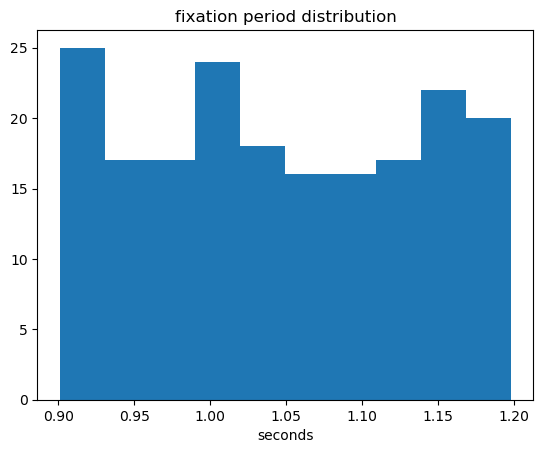

In [14]:
plt.hist(data['task_struct']['fixation_time'])
plt.xlabel('seconds')
plt.title('fixation period distribution');

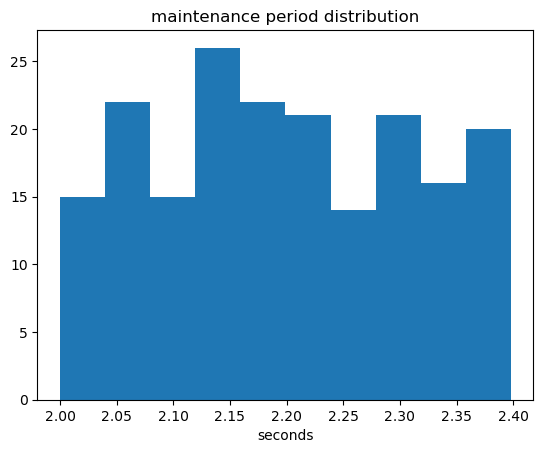

In [15]:
plt.hist(data['task_struct']['ISI'])
plt.xlabel('seconds')
plt.title('maintenance period distribution');

49


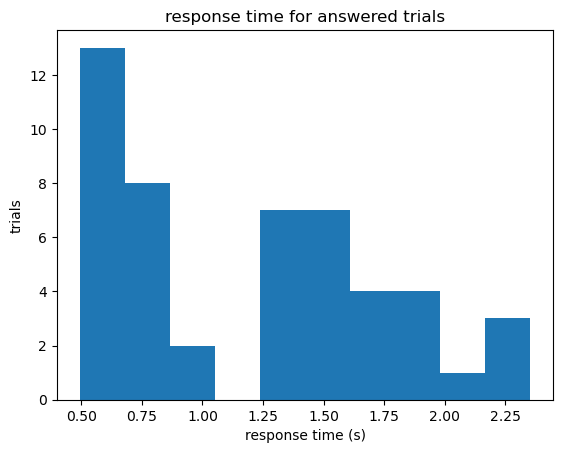

In [16]:
answered = np.where(~np.isnan(data['task_struct']['response_time']))[0]
print(len(answered))
plt.hist(data['task_struct']['response_time'][answered])
plt.ylabel('trials')
plt.xlabel('response time (s)')
plt.title('response time for answered trials');

In [17]:
# number correct out of the ones answered
np.sum(data['task_struct']['resp_key'][answered] == data['task_struct']['correct_responses'][answered])

48

Text(0.5, 1.0, 'slider position over time')

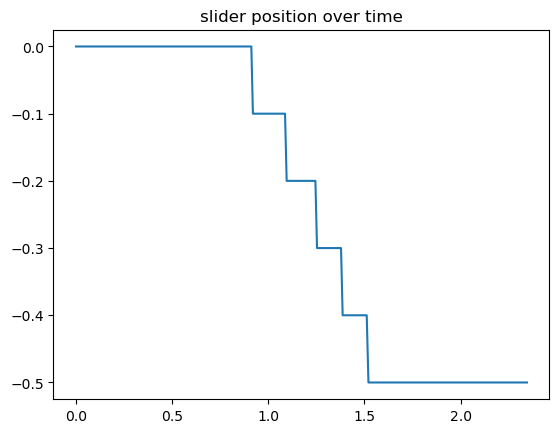

In [18]:
slider_info = data['task_struct']['slider_positions'][1]
plt.plot(slider_info['time'], slider_info['pos'])
plt.title('slider position over time')